**DFS**

**Activity 1:**

Consider a toy problem that can be represented as a following graph. How would you represent this graph in python?


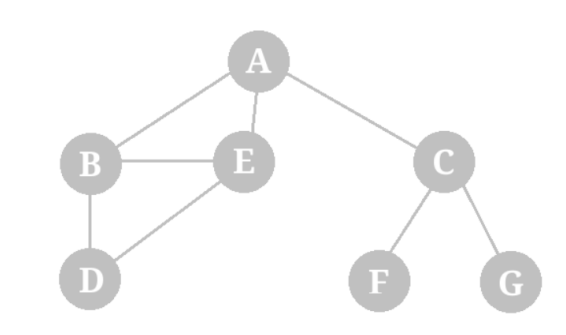

In [1]:
class Node:
  def __init__(self,state,parent,actions,totalCost):
    self.state=state
    self.parent=parent
    self.actions=actions
    self.totalCost=totalCost
    

In [2]:
graph={
    'A':Node('A',None,['B','C','E'],None),
    'B':Node('B',None,['A','D','E'],None),
    'C':Node('C',None,['A','F','G'],None),
    'D':Node('D',None,['B','E'],None),
    'E':Node('E',None,['A','B','D'],None),
    'F':Node('F',None,['C'],None),
    'G':Node('G',None,['C'],None)
}

**Activity 2:**

For the graph in previous activity, imagine node **A as starting node** and your **goal** is to reach **F**. Keeping depth first search in mind, describe a sequence of actions that you must take to reach that goal state.

In [3]:
def actionSequence(graph,initialState,goalState):
  solution=[goalState]
  currentParent=graph[goalState].parent
  while currentParent!=None:
    solution.append(currentParent)
    currentParent=graph[currentParent].parent
  solution.reverse()
  return solution


Remember that we can implement **depth first search** simply by using **LIFO** approach instead of FIFO that was used in breadth first search. Additionally we also don’t keep leaf nodes (nodes without children) in explored set.

In [4]:
def DFS():
  initialState='A'
  goalState='F'
  graph={
    'A':Node('A',None,['B','C','E'],None),
    'B':Node('B',None,['A','D','E'],None),
    'C':Node('C',None,['A','F','G'],None),
    'D':Node('D',None,['B','E'],None),
    'E':Node('E',None,['A','B','D'],None),
    'F':Node('F',None,['C'],None),
    'G':Node('G',None,['C'],None)}
  frontier=[initialState]
  explored=[]
  while len(frontier)!=0:
    currentNode= frontier.pop(len(frontier)-1)
    print(currentNode)
    explored.append(currentNode)
    currentChildren=0
    for child in graph[currentNode].actions:
      if child not in frontier and child not in explored:
        graph[child].parent=currentNode
        if graph[child].state==goalState:
          return actionSequence(graph, initialState,goalState)
        currentChildren=currentChildren+1
        frontier.append(child)
    if currentChildren==0:
        del explored[len(explored)-1]

Notice the difference in two portions of the code between breadth first search and depth first search. 

In the first we just **pop out the last entry from the queue** and 

in the 2nd difference we **delete leaf nodes from the graph**.

In [5]:
solution=DFS()
print(solution)

A
E
D
C
['A', 'C', 'F']


**Activity 3:**

Change **initial state to A** and set **goal state as D**. What will be resulting path of DFS search?What will be the sequence of nodes explored?

In [6]:
def DFS():
  initialState='A'
  goalState='D'
  graph={
    'A':Node('A',None,['B','C','E'],None),
    'B':Node('B',None,['A','D','E'],None),
    'C':Node('C',None,['A','F','G'],None),
    'D':Node('D',None,['B','E'],None),
    'E':Node('E',None,['A','B','D'],None),
    'F':Node('F',None,['C'],None),
    'G':Node('G',None,['C'],None)}
  frontier=[initialState]
  explored=[]
  while len(frontier)!=0:
    currentNode= frontier.pop(len(frontier)-1)
    print(currentNode)
    explored.append(currentNode)
    currentChildren=0
    for child in graph[currentNode].actions:
      if child not in frontier and child not in explored:
        graph[child].parent=currentNode
        if graph[child].state==goalState:
          return actionSequence(graph, initialState,goalState)
        currentChildren=currentChildren+1
        frontier.append(child)
    if currentChildren==0:
        del explored[len(explored)-1]

In [7]:
solution=DFS()
print(solution)

A
E
['A', 'E', 'D']


**uniform cost solution**

**Activity 4:**

Imagine the same tree but this time we also mention the cost of each edge.

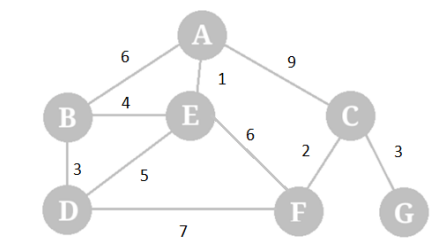

Implement a uniform cost solution to find the path from **C** to **B**.

First we modify our graph structure so that in Node. actions is an array of tuples where each tuple contains a vertex and its associated weight.

In [8]:
graph={
    'A':Node('A',None,[('B',6),('C',9),('E',1)],0),
    'B':Node('B',None,[('A',6),('D',3),('E',4)],0),
    'C':Node('C',None,[('A',9),('F',2),('G',3)],0),
    'D':Node('D',None,[('B',3),('E',5),('F',7)],0),
    'E':Node('E',None,[('A',1),('B',4),('D',5),('F',6)],0),
    'F':Node('F',None,[('C',2),('E',6),('D',7)],0),
    'G':Node('G',None,[('C',3)],0)
}

We also modify the frontier format which will now be a dictionary. This dictionary will contain each node (the state of the node will act as a key and its parent and accumulated cost from the initial state will be two attributes of a particular key).
We now define a function which will give the node/key for which the cost is minimum. This will be implementation of pop method from the priority queue.

In [9]:
import math
def findMin(frontier):
  #return that node in the frontier which has a lowest cost
  minV=math.inf
  node=''
  for i in frontier:
    if minV > frontier[i][1]:
      minV=frontier[i][1]
      node=i
  return node

In [10]:
class Node:
  def __init__(self,state,parent,actions,totalCost):
    self.state=state
    self.parent=parent
    self.actions=actions
    self.totalCost=totalCost

def actionSequence(graph,initialState,goalState):
  solution=[goalState]
  currentParent=graph[goalState].parent
  while currentParent!=None:
    solution.append(currentParent)
    currentParent=graph[currentParent].parent
  solution.reverse()
  return solution

In [11]:
def UCS():
  initialState='C'
  goalState='B'
  graph={
    'A':Node('A',None,[('B',6),('C',9),('E',1)],0),
    'B':Node('B',None,[('A',6),('D',3),('E',4)],0),
    'C':Node('C',None,[('A',9),('F',2),('G',3)],0),
    'D':Node('D',None,[('B',3),('E',5),('F',7)],0),
    'E':Node('E',None,[('A',1),('B',4),('D',5),('F',6)],0),
    'F':Node('F',None,[('C',2),('E',6),('D',7)],0),
    'G':Node('G',None,[('C',3)],0)}
  frontier=dict()
  frontier[initialState]=(None,0)
  explored=[]
  while len(frontier)!=0:
    currentNode=findMin(frontier)
    del frontier[currentNode]
    if graph[currentNode].state==goalState:
      return actionSequence(graph,initialState,goalState)
    explored.append(currentNode)
    for child in graph[currentNode].actions:
      currentCost=child[1]+graph[currentNode].totalCost
      if child[0] not in frontier and child[0] not in explored:
        graph[child[0]].parent=currentNode
        graph[child[0]].totalCost=currentCost
        frontier[child[0]]=(graph[child[0]].parent,graph[child[0]].totalCost)
      elif child[0] in frontier:
        if frontier[child[0]][1]<currentCost:
          graph[child[0]].parent= frontier[child[0]][0]
          graph[child[0]].totalCost=frontier[child[0]][1]
        else:
          frontier[child[0]]=(currentNode,currentCost)
          graph[child[0]].parent= frontier[child[0]][0]
          graph[child[0]].totalCost=frontier[child[0]][1]

In [12]:
solution=UCS()
print(solution)

['C', 'F', 'D', 'B']
